In [1]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [2]:
x = load_model("checkpoint/model_val_loss-0.03.h5")

In [3]:
def pred(mode, picture):
    if mode == 0:
        img = image.load_img("data/test/NORMAL/{0}".format(picture) , target_size = (224, 224))
        plt.imshow(img)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        img /= 255.
        prediction = x.predict(img)
    else:
        img = image.load_img("data/test/PNEUMONIA/{0}".format(picture) , target_size = (224, 224))
        plt.imshow(img)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        img /= 255.

        prediction = x.predict(img)
        
    if prediction[0] > 0.5:
        print("Keuhkokuume {:.2%} varmuudella".format(prediction[0][0]))
    else:
        print("Ei keuhkokuumetta {:.2%} varmuudella".format(1-prediction[0][0]))
    plt.show()

Ei keuhkokuumetta 99.61% varmuudella


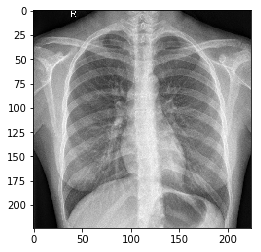

In [15]:
pred(0, "IM-0013-0001.jpeg")

Ei keuhkokuumetta 70.77% varmuudella


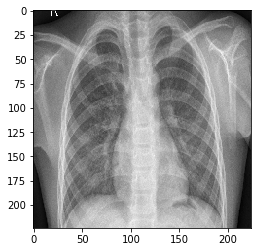

In [17]:
pred(0, "IM-0015-0001.jpeg")

Keuhkokuume 96.20% varmuudella


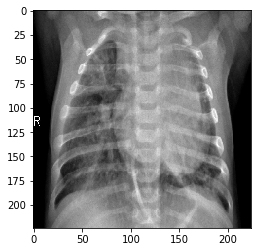

In [18]:
pred(1, "person100_bacteria_475.jpeg")

Keuhkokuume 99.91% varmuudella


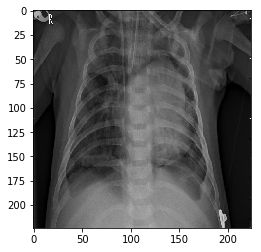

In [19]:
pred(1, "person100_bacteria_477.jpeg")